Imports

In [10]:
from sklearn.linear_model import perceptron
import pandas as pd
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import and prepare data

In [11]:
df = pd.read_csv("phishing_websites.txt")
# print(df.head())
y = df['Result']
x = df.drop(['Result'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)


data features:

@attribute having_IP_Address  { -1,1 }
@attribute URL_Length   { 1,0,-1 }
@attribute Shortining_Service { 1,-1 }
@attribute having_At_Symbol   { 1,-1 }
@attribute double_slash_redirecting { -1,1 }
@attribute Prefix_Suffix  { -1,1 }
@attribute having_Sub_Domain  { -1,0,1 }
@attribute SSLfinal_State  { -1,1,0 }
@attribute Domain_registeration_length { -1,1 }
@attribute Favicon { 1,-1 }
@attribute port { 1,-1 }
@attribute HTTPS_token { -1,1 }
@attribute Request_URL  { 1,-1 }
@attribute URL_of_Anchor { -1,0,1 }
@attribute Links_in_tags { 1,-1,0 }
@attribute SFH  { -1,1,0 }
@attribute Submitting_to_email { -1,1 }
@attribute Abnormal_URL { -1,1 }
@attribute Redirect  { 0,1 }
@attribute on_mouseover  { 1,-1 }
@attribute RightClick  { 1,-1 }
@attribute popUpWidnow  { 1,-1 }
@attribute Iframe { 1,-1 }
@attribute age_of_domain  { -1,1 }
@attribute DNSRecord   { -1,1 }
@attribute web_traffic  { -1,0,1 }
@attribute Page_Rank { -1,1 }
@attribute Google_Index { 1,-1 }
@attribute Links_pointing_to_page { 1,0,-1 }
@attribute Statistical_report { -1,1 }
@attribute Result  { -1,1 }

# Perceptron

test different alphas on Perceptron

In [13]:
perc_alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
perc_acc_score = []
for alpha in perc_alphas:
    # Create the perceptron object (net)
    net = perceptron.Perceptron(alpha=alpha, max_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)

    # Train the perceptron object (net)
    net.fit(x_train, y_train)
    print("alpha: ", alpha)

    # Do a prediction
    pred = net.predict(x_test)
    acc = accuracy_score(y_test, pred) * 100
    print("accuracy: {0:2f}%".format(acc))
    perc_acc_score.append(acc)
    # print classification report
    print(classification_report(y_test, pred))


alpha:  1e-05
accuracy: 88.856729%
             precision    recall  f1-score   support

         -1       0.92      0.82      0.87      1248
          1       0.87      0.94      0.90      1516

avg / total       0.89      0.89      0.89      2764

alpha:  5e-05
accuracy: 89.363242%
             precision    recall  f1-score   support

         -1       0.94      0.81      0.87      1248
          1       0.86      0.96      0.91      1516

avg / total       0.90      0.89      0.89      2764

alpha:  0.0001
accuracy: 90.810420%
             precision    recall  f1-score   support

         -1       0.91      0.88      0.90      1248
          1       0.91      0.93      0.92      1516

avg / total       0.91      0.91      0.91      2764

alpha:  0.0005
accuracy: 88.639653%
             precision    recall  f1-score   support

         -1       0.96      0.78      0.86      1248
          1       0.84      0.97      0.90      1516

avg / total       0.90      0.89      0.88      2764

.. and plot a graph to find the best alpha

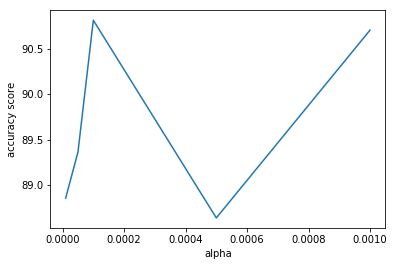

In [14]:
# create 2d graph alpha by accuracy
plt.xlabel("alpha")
plt.ylabel("accuracy score")
plt.plot(perc_alphas, perc_acc_score)
plt.show()

it seemes alpha = 0.0001 provides best result

so we try perceptron with this alpha:

In [15]:
# The graph show us with alpha = 0.0001 an accuracy of ~91.81% would be reached
# Create the perceptron object (net)
net = perceptron.Perceptron(alpha=0.0001, max_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
# Train the perceptron object (net)
net.fit(x_train, y_train)
# Output the coefficints
for i in range(len(x.columns)):
    print("Coefficient " + str(i + 1) + ": " + str(net.coef_[0, i]))
print("Bias " + str(net.intercept_))
# Do a prediction
pred = net.predict(x_test)
acc = accuracy_score(y_test, pred) * 100
print("accuracy: {0:2f}%".format(acc))
# print classification report?
print(classification_report(y_test, pred))


Coefficient 1: 0.014
Coefficient 2: -0.002
Coefficient 3: -0.01
Coefficient 4: 0.002
Coefficient 5: -0.006
Coefficient 6: 0.06200000000000004
Coefficient 7: 0.008
Coefficient 8: 0.032000000000000015
Coefficient 9: 0.002
Coefficient 10: -0.01
Coefficient 11: 0.014
Coefficient 12: -0.018000000000000002
Coefficient 13: 0.002
Coefficient 14: 0.056000000000000036
Coefficient 15: 0.014
Coefficient 16: 0.014
Coefficient 17: -0.006
Coefficient 18: 0.002
Coefficient 19: -0.024000000000000007
Coefficient 20: 0.01
Coefficient 21: 0.01
Coefficient 22: -0.002
Coefficient 23: -0.006
Coefficient 24: 0.006
Coefficient 25: 0.006
Coefficient 26: 0.008
Coefficient 27: 0.006
Coefficient 28: 0.014
Coefficient 29: 0.016
Coefficient 30: 0.002
Bias [0.066]
accuracy: 91.642547%
             precision    recall  f1-score   support

         -1       0.92      0.89      0.91      1248
          1       0.91      0.94      0.92      1516

avg / total       0.92      0.92      0.92      2764



the confusion matrix looks like this:

Coefficient Matrix: 
[[1112  136]
 [  95 1421]]


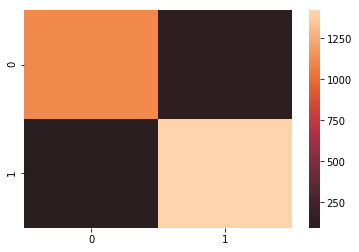

In [16]:
# print confusion matrix using seaborn
cm = confusion_matrix(y_test, pred)
print("Coefficient Matrix: ")
print(cm)
sns.heatmap(cm, center=True)
plt.show()

# MLPClassifier

prepare data for MLPClassifier

In [18]:
y = df['Result']
x = df.drop(['Result'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)


try different learning_rates, alphas and optimizers with MLPClassifier

In [19]:
learning_rates = ['constant', 'invscaling', 'adaptive']
alphas = [0.0001, 0.001, 0.01]
optimizers = ['adam', 'lbfgs', 'sgd']
alpha_list = []
acc_list = []

for opt in optimizers:
    print("optimizer: ", opt)
    for lr in range(len(learning_rates)):
        print("learning rate:", learning_rates[lr])
        for alpha in alphas:
            print("alpha: ", alpha)
            mlp = MLPClassifier(max_iter=50, alpha=alpha,
                                learning_rate=learning_rates[lr], solver=opt, tol=0.00001)
            mlp.fit(x_train, y_train)
            y_pred = mlp.predict(x_test)
            acc_score = accuracy_score(y_test, y_pred)
            acc_list.append(acc_score)
            alpha_list.append(alpha)

            # TODO: print classification report?
            # print(classification_report(y, y_pred))

            print("Accuracy Score: ", acc_score)


optimizer:  adam
learning rate: constant
alpha:  0.0001


C:\Users\David\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy Score:  0.9522431259044862
alpha:  0.001
Accuracy Score:  0.9511577424023154
alpha:  0.01
Accuracy Score:  0.951519536903039
learning rate: invscaling
alpha:  0.0001
Accuracy Score:  0.9518813314037626
alpha:  0.001
Accuracy Score:  0.953328509406657
alpha:  0.01
Accuracy Score:  0.9482633863965267
learning rate: adaptive
alpha:  0.0001
Accuracy Score:  0.9489869753979739
alpha:  0.001
Accuracy Score:  0.951519536903039
alpha:  0.01
Accuracy Score:  0.9511577424023154
optimizer:  lbfgs
learning rate: constant
alpha:  0.0001
Accuracy Score:  0.9526049204052098
alpha:  0.001
Accuracy Score:  0.9598408104196816
alpha:  0.01
Accuracy Score:  0.9605643994211288
learning rate: invscaling
alpha:  0.0001
Accuracy Score:  0.9591172214182344
alpha:  0.001
Accuracy Score:  0.9587554269175108
alpha:  0.01
Accuracy Score:  0.9551374819102749
learning rate: adaptive
alpha:  0.0001
Accuracy Score:  0.9587554269175108
alpha:  0.001
Accuracy Score:  0.9540520984081042
alpha:  0.01
Accuracy Sco

.. and plot the results on 3d graphs

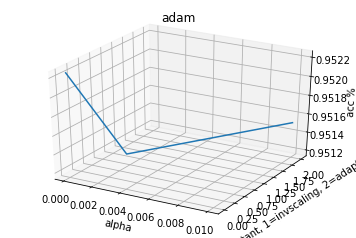

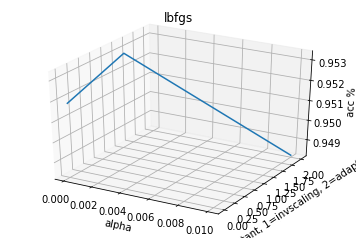

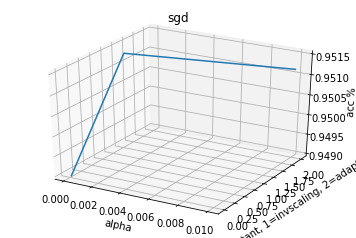

In [20]:
# build 3d plot loss(learning_rates, alphas)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title(optimizers[0])
ax.set_xlabel("alpha")
ax.set_ylabel("0=constant, 1=invscaling, 2=adaptive")
ax.set_zlabel("acc %")
ax.plot(alpha_list[:3], range(3), acc_list[:3])
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title(optimizers[1])
ax.set_xlabel("alpha")
ax.set_ylabel("0=constant, 1=invscaling, 2=adaptive")
ax.set_zlabel("acc %")
ax.plot(alpha_list[3:6], range(3), acc_list[3:6])
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("alpha")
ax.set_ylabel("0=constant, 1=invscaling, 2=adaptive")
ax.set_zlabel("acc %")
ax.set_title(optimizers[2])
ax.plot(alpha_list[6:9], range(3), acc_list[6:9])
plt.show()

it seemes lbfgs with invscaling on an alpha of 0.001 provides the best results